# Gradient Boosted Classification and XGBoost Regression Models

### Upload Relevant Datasets

In [119]:
import pandas as pd

In [120]:
#Upload hospitaldata_iterative.csv
hd_iter = pd.read_csv('https://raw.githubusercontent.com/maringow/DataMiningGroupProject/master/hospitaldata_iterative.csv')

In [121]:
hd_iter.head(1)

,Unnamed: 0,Unnamed: 0.1,Provider ID,Hospital Name,Address,City,State,ZIP Code,COMP_HIP_KNEE,MORT_30_AMI,...,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,3.0,14.5,...,75.0,70.0,85.0,79.0,83.0,86.0,84.0,506.0,21.0,2.0


In [122]:
#Upload hospitaldata_knn.csv
hd_KMeans = pd.read_csv('https://raw.githubusercontent.com/maringow/DataMiningGroupProject/master/hospitaldata_knn.csv')

In [123]:
hd_KMeans.head(1)

,Unnamed: 0,Unnamed: 0.1,Provider ID,Hospital Name,Address,City,State,ZIP Code,COMP_HIP_KNEE,MORT_30_AMI,...,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,3.0,14.5,...,75.0,70.0,85.0,79.0,83.0,86.0,84.0,506.0,21.0,2.0


In [126]:
#Upload hospitaldata_mean.csv
hd_means = pd.read_csv('https://raw.githubusercontent.com/maringow/DataMiningGroupProject/master/hospitaldata_mean.csv')

In [127]:
hd_means.head(1)

,Unnamed: 0,Unnamed: 0.1,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,...,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent,STAR_RATING
0,0,0,10001,3.0,14.5,4.5,8.9,12.5,16.2,13.7,...,86,84,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,506,21,2


## XGBoost

### Prepare the hospitaldata_iterative Dataset for the Regression Model Run

In [128]:
# Explore the Iter dataset
hd_iter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 40 columns):
Unnamed: 0                      3529 non-null int64
Unnamed: 0.1                    3529 non-null int64
Provider ID                     3529 non-null object
Hospital Name                   3529 non-null object
Address                         3529 non-null object
City                            3529 non-null object
State                           3529 non-null object
ZIP Code                        3529 non-null float64
COMP_HIP_KNEE                   3529 non-null float64
MORT_30_AMI                     3529 non-null float64
MORT_30_CABG                    3529 non-null float64
MORT_30_COPD                    3529 non-null float64
MORT_30_HF                      3529 non-null float64
MORT_30_PN                      3529 non-null float64
MORT_30_STK                     3529 non-null float64
PSI_10_POST_KIDNEY              3529 non-null float64
PSI_11_POST_RESP                3529 n

In [129]:
# Drop columns flagged based on the Group Features Engineering strategy
hd_iter.drop(['STAR_RATING', 'Survey Response Rate Percent', 'Number of Completed Surveys', 'Unnamed: 0', 'Unnamed: 0.1', 'Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code' ], axis=1, inplace=True)

In [130]:
# Explore the Iter dataset
hd_iter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 29 columns):
COMP_HIP_KNEE                3529 non-null float64
MORT_30_AMI                  3529 non-null float64
MORT_30_CABG                 3529 non-null float64
MORT_30_COPD                 3529 non-null float64
MORT_30_HF                   3529 non-null float64
MORT_30_PN                   3529 non-null float64
MORT_30_STK                  3529 non-null float64
PSI_10_POST_KIDNEY           3529 non-null float64
PSI_11_POST_RESP             3529 non-null float64
PSI_12_POSTOP_PULMEMB_DVT    3529 non-null float64
PSI_13_POST_SEPSIS           3529 non-null float64
PSI_14_POSTOP_DEHIS          3529 non-null float64
PSI_15_ACC_LAC               3529 non-null float64
PSI_3_ULCER                  3529 non-null float64
PSI_4_SURG_COMP              3529 non-null float64
PSI_6_IAT_PTX                3529 non-null float64
PSI_8_POST_HIP               3529 non-null float64
PSI_90_SAFETY             

In [131]:
#import the required packages
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

In [132]:
#split dataset in features and target variable
feature_cols = ['COMP_HIP_KNEE', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD','MORT_30_HF','MORT_30_PN','MORT_30_STK','PSI_10_POST_KIDNEY','PSI_11_POST_RESP','PSI_12_POSTOP_PULMEMB_DVT','PSI_13_POST_SEPSIS','PSI_14_POSTOP_DEHIS','PSI_15_ACC_LAC','PSI_3_ULCER','PSI_4_SURG_COMP','PSI_6_IAT_PTX','PSI_8_POST_HIP','PSI_90_SAFETY','H_CLEAN_LINEAR_SCORE','H_COMP_1_LINEAR_SCORE','H_COMP_2_LINEAR_SCORE','H_COMP_3_LINEAR_SCORE','H_COMP_5_LINEAR_SCORE','H_COMP_6_LINEAR_SCORE','H_COMP_7_LINEAR_SCORE','H_HSP_RATING_LINEAR_SCORE','H_QUIET_LINEAR_SCORE']
X = hd_iter[feature_cols] # Features
Y = hd_iter.H_RECMND_LINEAR_SCORE # Target variable

In [133]:
# split X and Y into training and testing sets
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state=42)

In [134]:
X_train.head(2)

,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,...,PSI_90_SAFETY,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE
2499,2.8,13.1,3.2,8.8,13.9,14.0,13.0,1.64,8.29,4.66,...,1.02,87.0,92.0,93.0,85.0,76.0,87.0,83.0,91.0,86.0
2357,2.7,13.6,3.6,9.4,12.2,14.6,12.9,1.21,10.32,4.34,...,1.12,80.0,90.0,91.0,81.0,74.0,87.0,80.0,86.0,74.0


In [135]:
Y_train.head(2)

2499    92.0
2357    85.0
Name: H_RECMND_LINEAR_SCORE, dtype: float64

### Run XGBoost on the hospitaldata_iterative Dataset

In [136]:
import xgboost as xgb
from xgboost import plot_importance

In [137]:
# xgb models only accept 'DMatrix' input; convert the data here
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# parameter grid for xgb model
param_dict = {
    # Parameters that we are going to tune. See discussion below for explanation of 
    # parameters and tuning
    'max_depth':6, 
    'min_child_weight': 1,
    'eta':.1,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
    'eval_metric':'rmse'
}

# train XGB model on split training data using split test data
num_boost_round=999
model = xgb.train(
    param_dict,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Model's best RMSE on test set: ", model.best_score)
print("Model's best iteration: ", model.best_iteration+1)

[0]	Test-rmse:78.995
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:71.111
[2]	Test-rmse:64.014
[3]	Test-rmse:57.6291
[4]	Test-rmse:51.8816
[5]	Test-rmse:46.7042
[6]	Test-rmse:42.0455
[7]	Test-rmse:37.8542
[8]	Test-rmse:34.0823
[9]	Test-rmse:30.6833
[10]	Test-rmse:27.6284
[11]	Test-rmse:24.8799
[12]	Test-rmse:22.407
[13]	Test-rmse:20.1804
[14]	Test-rmse:18.1772
[15]	Test-rmse:16.3744
[16]	Test-rmse:14.7527
[17]	Test-rmse:13.2952
[18]	Test-rmse:11.9844
[19]	Test-rmse:10.8062
[20]	Test-rmse:9.74886
[21]	Test-rmse:8.79642
[22]	Test-rmse:7.94322
[23]	Test-rmse:7.1801
[24]	Test-rmse:6.49303
[25]	Test-rmse:5.87411
[26]	Test-rmse:5.32376
[27]	Test-rmse:4.83231
[28]	Test-rmse:4.39434
[29]	Test-rmse:4.00009
[30]	Test-rmse:3.65169
[31]	Test-rmse:3.34173
[32]	Test-rmse:3.06626
[33]	Test-rmse:2.82421
[34]	Test-rmse:2.61072
[35]	Test-rmse:2.42424
[36]	Test-rmse:2.26033
[37]	Test-rmse:2.11751
[38]	Test-rmse:1.99386
[39]	Test-rmse:1.88885
[40]	Test-rmse:1.79651
[41]	Test-rmse:

In [138]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# convert training data to DMatrix object
dpred=xgb.DMatrix(X_train)

# predict RMSE of Gradient Boosted Decision Tree model on training data
print("RMSE of XGB model on training data: ",
      np.sqrt(mean_squared_error(model.predict(dpred), Y_train)))
RMSE_iter_t = np.sqrt(mean_squared_error(model.predict(dpred), Y_train))

# predict RMSE of model on test data
GBDT_test_pred = model.predict(xgb.DMatrix(X_test))
print("RMSE of XGB model on test data: ",
      np.sqrt(mean_squared_error(GBDT_test_pred, Y_test)))
RMSE_iter_test = np.sqrt(mean_squared_error(GBDT_test_pred, Y_test))


RMSE of XGB model on training data:  0.6481981464358001
RMSE of XGB model on test data:  1.310065897247246


Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.
https://www.statisticshowto.datasciencecentral.com/rmse/

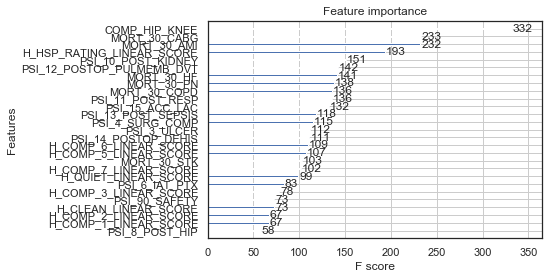

In [139]:
# plot F-score of each feature using xgboost's .plot_importance() method
plt.show(plot_importance(model))

F Value in Regression
The F value in regression is the result of a test where the null hypothesis is that all of the regression coefficients are equal to zero. In other words, the model has no predictive capability. Basically, the f-test compares your model with zero predictor variables (the intercept only model), and decides whether your added coefficients improved the model. If you get a significant result, then whatever coefficients you included in your model improved the model’s fit.
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/f-statistic-value-test/

The F statistic is a ratio of 2 different measure of variance for the data. If the null hypothesis is true then these are both estimates of the same thing and the ratio will be around 1.

The numerator is computed by measuring the variance of the means and if the true means of the groups are identical then this is a function of the overall variance of the data. But if the null hypothesis is false and the means are not all equal, then this measure of variance will be larger.

The denominator is an average of the sample variances for each group, which is an estimate of the overall population variance (assuming all groups have equal variances).

So when the null of all means equal is true then the 2 measures (with some extra terms for degrees of freedom) will be similar and the ratio will be close to 1. If the null is false, then the numerator will be large relative to the denominator and the ratio will be greater than 1.

### Prepare the hospitaldata_knn.csv Dataset for the Regression Model Run

In [140]:
# Explore the KNN dataset
hd_KMeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 40 columns):
Unnamed: 0                      3529 non-null int64
Unnamed: 0.1                    3529 non-null int64
Provider ID                     3529 non-null object
Hospital Name                   3529 non-null object
Address                         3529 non-null object
City                            3529 non-null object
State                           3529 non-null object
ZIP Code                        3529 non-null float64
COMP_HIP_KNEE                   3529 non-null float64
MORT_30_AMI                     3529 non-null float64
MORT_30_CABG                    3529 non-null float64
MORT_30_COPD                    3529 non-null float64
MORT_30_HF                      3529 non-null float64
MORT_30_PN                      3529 non-null float64
MORT_30_STK                     3529 non-null float64
PSI_10_POST_KIDNEY              3529 non-null float64
PSI_11_POST_RESP                3529 n

In [141]:
# Drop columns flagged based on the Group Features Engineering strategy
hd_KMeans.drop(['STAR_RATING', 'Survey Response Rate Percent', 'Number of Completed Surveys', 'Unnamed: 0', 'Unnamed: 0.1', 'Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code' ], axis=1, inplace=True)

In [142]:
# Explore the KNN dataset
hd_KMeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 29 columns):
COMP_HIP_KNEE                3529 non-null float64
MORT_30_AMI                  3529 non-null float64
MORT_30_CABG                 3529 non-null float64
MORT_30_COPD                 3529 non-null float64
MORT_30_HF                   3529 non-null float64
MORT_30_PN                   3529 non-null float64
MORT_30_STK                  3529 non-null float64
PSI_10_POST_KIDNEY           3529 non-null float64
PSI_11_POST_RESP             3529 non-null float64
PSI_12_POSTOP_PULMEMB_DVT    3529 non-null float64
PSI_13_POST_SEPSIS           3529 non-null float64
PSI_14_POSTOP_DEHIS          3529 non-null float64
PSI_15_ACC_LAC               3529 non-null float64
PSI_3_ULCER                  3529 non-null float64
PSI_4_SURG_COMP              3529 non-null float64
PSI_6_IAT_PTX                3529 non-null float64
PSI_8_POST_HIP               3529 non-null float64
PSI_90_SAFETY             

In [143]:
#split dataset in features and target variable
X_k = hd_KMeans[feature_cols] # Features
Y_k = hd_KMeans.H_RECMND_LINEAR_SCORE # Target variable

In [144]:
# split X and Y into training and testing sets
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_k,Y_k,test_size=0.33, random_state=42)

In [145]:
X_train.head(2)

,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,...,PSI_90_SAFETY,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE
2499,2.8,13.1,3.2,8.8,13.9,14.0,13.0,1.64,8.29,4.66,...,1.02,87.0,92.0,93.0,85.0,76.0,87.0,83.0,91.0,86.0
2357,2.7,13.6,3.6,9.4,12.2,14.6,12.9,1.21,10.32,4.34,...,1.12,80.0,90.0,91.0,81.0,74.0,87.0,80.0,86.0,74.0


In [146]:
Y_train.head(2)

2499    92.0
2357    85.0
Name: H_RECMND_LINEAR_SCORE, dtype: float64

### Run XGBoost on the hospitaldata_knn Dataset

In [147]:
# xgb models only accept 'DMatrix' input; convert the data here
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# parameter grid for xgb model
param_dict = {
    # Parameters that we are going to tune. See discussion below for explanation of 
    # parameters and tuning
    'max_depth':6, 
    'min_child_weight': 1,
    'eta':.1,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
    'eval_metric':'rmse'
}

# train XGB model on split training data using split test data
num_boost_round=999
model = xgb.train(
    param_dict,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Model's best RMSE on test set: ", model.best_score)
print("Model's best iteration: ", model.best_iteration+1)

[0]	Test-rmse:78.995
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:71.111
[2]	Test-rmse:64.014
[3]	Test-rmse:57.6291
[4]	Test-rmse:51.8816
[5]	Test-rmse:46.7042
[6]	Test-rmse:42.0455
[7]	Test-rmse:37.8542
[8]	Test-rmse:34.0823
[9]	Test-rmse:30.6833
[10]	Test-rmse:27.6284
[11]	Test-rmse:24.8799
[12]	Test-rmse:22.407
[13]	Test-rmse:20.1804
[14]	Test-rmse:18.1772
[15]	Test-rmse:16.3744
[16]	Test-rmse:14.7527
[17]	Test-rmse:13.2952
[18]	Test-rmse:11.9844
[19]	Test-rmse:10.8055
[20]	Test-rmse:9.74798
[21]	Test-rmse:8.79561
[22]	Test-rmse:7.94182
[23]	Test-rmse:7.17118
[24]	Test-rmse:6.48391
[25]	Test-rmse:5.86907
[26]	Test-rmse:5.31781
[27]	Test-rmse:4.82748
[28]	Test-rmse:4.39016
[29]	Test-rmse:3.99836
[30]	Test-rmse:3.65117
[31]	Test-rmse:3.3451
[32]	Test-rmse:3.07196
[33]	Test-rmse:2.83048
[34]	Test-rmse:2.61553
[35]	Test-rmse:2.42884
[36]	Test-rmse:2.26754
[37]	Test-rmse:2.1263
[38]	Test-rmse:2.00295
[39]	Test-rmse:1.89879
[40]	Test-rmse:1.80834
[41]	Test-rmse:1

In [148]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# convert training data to DMatrix object
dpred=xgb.DMatrix(X_train)

# predict RMSE of Gradient Boosted Decision Tree model on training data
print("RMSE of XGB model on training data: ",
      np.sqrt(mean_squared_error(model.predict(dpred), Y_train)))
RMSE_knn_t = np.sqrt(mean_squared_error(model.predict(dpred), Y_train))

# predict RMSE of model on test data
GBDT_test_pred = model.predict(xgb.DMatrix(X_test))
print("RMSE of XGB model on test data: ",
      np.sqrt(mean_squared_error(GBDT_test_pred, Y_test)))
RMSE_knn_test = np.sqrt(mean_squared_error(GBDT_test_pred, Y_test))

RMSE of XGB model on training data:  0.8589708529100836
RMSE of XGB model on test data:  1.3471061889410627


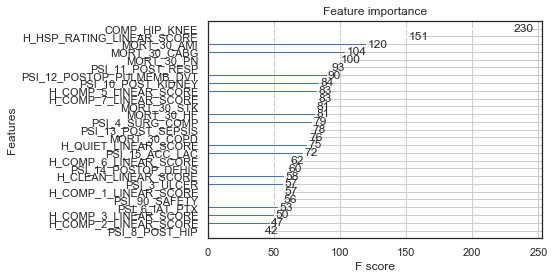

In [149]:
# plot F-score of each feature using xgboost's .plot_importance() method
plt.show(plot_importance(model))

### Prepare the hospitaldata_mean.csv Dataset for the Regression Model Run

In [150]:
# Explore the Means dataset
hd_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 40 columns):
Unnamed: 0                      3529 non-null int64
Unnamed: 0.1                    3529 non-null int64
Provider ID                     3529 non-null object
COMP_HIP_KNEE                   3529 non-null float64
MORT_30_AMI                     3529 non-null float64
MORT_30_CABG                    3529 non-null float64
MORT_30_COPD                    3529 non-null float64
MORT_30_HF                      3529 non-null float64
MORT_30_PN                      3529 non-null float64
MORT_30_STK                     3529 non-null float64
PSI_10_POST_KIDNEY              3529 non-null float64
PSI_11_POST_RESP                3529 non-null float64
PSI_12_POSTOP_PULMEMB_DVT       3529 non-null float64
PSI_13_POST_SEPSIS              3529 non-null float64
PSI_14_POSTOP_DEHIS             3529 non-null float64
PSI_15_ACC_LAC                  3529 non-null float64
PSI_3_ULCER                     35

In [151]:
# Drop columns flagged based on the Group Features Engineering strategy
hd_means.drop(['STAR_RATING', 'Survey Response Rate Percent', 'Number of Completed Surveys', 'Unnamed: 0', 'Unnamed: 0.1', 'Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code' ], axis=1, inplace=True)

In [152]:
# Explore the Means dataset
hd_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 29 columns):
COMP_HIP_KNEE                3529 non-null float64
MORT_30_AMI                  3529 non-null float64
MORT_30_CABG                 3529 non-null float64
MORT_30_COPD                 3529 non-null float64
MORT_30_HF                   3529 non-null float64
MORT_30_PN                   3529 non-null float64
MORT_30_STK                  3529 non-null float64
PSI_10_POST_KIDNEY           3529 non-null float64
PSI_11_POST_RESP             3529 non-null float64
PSI_12_POSTOP_PULMEMB_DVT    3529 non-null float64
PSI_13_POST_SEPSIS           3529 non-null float64
PSI_14_POSTOP_DEHIS          3529 non-null float64
PSI_15_ACC_LAC               3529 non-null float64
PSI_3_ULCER                  3529 non-null float64
PSI_4_SURG_COMP              3529 non-null float64
PSI_6_IAT_PTX                3529 non-null float64
PSI_8_POST_HIP               3529 non-null float64
PSI_90_SAFETY             

In [153]:
#split dataset in features and target variable
X_m = hd_means[feature_cols] # Features
Y_m = hd_means.H_RECMND_LINEAR_SCORE # Target variable

In [154]:
# split X and Y into training and testing sets
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_m,Y_m,test_size=0.33, random_state=42)

### Run XGBoost on the hospitaldata_mean Dataset

In [155]:
# xgb models only accept 'DMatrix' input; convert the data here
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# parameter grid for xgb model
param_dict = {
    # Parameters that we are going to tune. See discussion below for explanation of 
    # parameters and tuning
    'max_depth':6, 
    'min_child_weight': 1,
    'eta':.1,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
    'eval_metric':'rmse'
}

# train XGB model on split training data using split test data
num_boost_round=999
model = xgb.train(
    param_dict,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

print("Model's best RMSE on test set: ", model.best_score)
print("Model's best iteration: ", model.best_iteration+1)

[0]	Test-rmse:78.995
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:71.111
[2]	Test-rmse:64.014
[3]	Test-rmse:57.6291
[4]	Test-rmse:51.8816
[5]	Test-rmse:46.7042
[6]	Test-rmse:42.0455
[7]	Test-rmse:37.8542
[8]	Test-rmse:34.0823
[9]	Test-rmse:30.6833
[10]	Test-rmse:27.6284
[11]	Test-rmse:24.8799
[12]	Test-rmse:22.407
[13]	Test-rmse:20.1804
[14]	Test-rmse:18.1772
[15]	Test-rmse:16.3744
[16]	Test-rmse:14.7527
[17]	Test-rmse:13.2952
[18]	Test-rmse:11.9844
[19]	Test-rmse:10.8067
[20]	Test-rmse:9.74805
[21]	Test-rmse:8.79706
[22]	Test-rmse:7.94277
[23]	Test-rmse:7.17638
[24]	Test-rmse:6.48802
[25]	Test-rmse:5.87411
[26]	Test-rmse:5.32474
[27]	Test-rmse:4.83129
[28]	Test-rmse:4.39277
[29]	Test-rmse:3.99906
[30]	Test-rmse:3.65018
[31]	Test-rmse:3.34053
[32]	Test-rmse:3.06744
[33]	Test-rmse:2.82485
[34]	Test-rmse:2.61304
[35]	Test-rmse:2.42526
[36]	Test-rmse:2.2619
[37]	Test-rmse:2.1218
[38]	Test-rmse:1.9979
[39]	Test-rmse:1.89335
[40]	Test-rmse:1.80377
[41]	Test-rmse:1.

In [156]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# convert training data to DMatrix object
dpred=xgb.DMatrix(X_train)

# predict RMSE of Gradient Boosted Decision Tree model on training data
print("RMSE of XGB model on training data: ",
      np.sqrt(mean_squared_error(model.predict(dpred), Y_train)))
RMSE_means_t = np.sqrt(mean_squared_error(model.predict(dpred), Y_train))

# predict RMSE of model on test data
GBDT_test_pred = model.predict(xgb.DMatrix(X_test))
print("RMSE of XGB model on test data: ",
      np.sqrt(mean_squared_error(GBDT_test_pred, Y_test)))
RMSE_means_test = np.sqrt(mean_squared_error(GBDT_test_pred, Y_test))

RMSE of XGB model on training data:  0.8563673282875041
RMSE of XGB model on test data:  1.3407072651250194


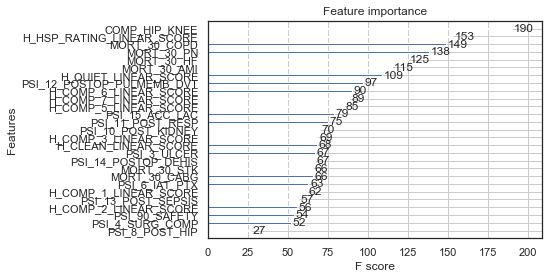

In [157]:
# plot F-score of each feature using xgboost's .plot_importance() method
plt.show(plot_importance(model))

## Gradient Decent

### Prepare the hospitaldata_iterative Dataset for the Classification Model Run

In [158]:
#Upload hospitaldata_iterative.csv
hd_iter = pd.read_csv('https://raw.githubusercontent.com/maringow/DataMiningGroupProject/master/hospitaldata_iterative.csv')

In [159]:
# Explore the Iter dataset
hd_iter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 40 columns):
Unnamed: 0                      3529 non-null int64
Unnamed: 0.1                    3529 non-null int64
Provider ID                     3529 non-null object
Hospital Name                   3529 non-null object
Address                         3529 non-null object
City                            3529 non-null object
State                           3529 non-null object
ZIP Code                        3529 non-null float64
COMP_HIP_KNEE                   3529 non-null float64
MORT_30_AMI                     3529 non-null float64
MORT_30_CABG                    3529 non-null float64
MORT_30_COPD                    3529 non-null float64
MORT_30_HF                      3529 non-null float64
MORT_30_PN                      3529 non-null float64
MORT_30_STK                     3529 non-null float64
PSI_10_POST_KIDNEY              3529 non-null float64
PSI_11_POST_RESP                3529 n

In [160]:
# Drop columns flagged based on the Group Features Engineering strategy
hd_iter.drop(['H_RECMND_LINEAR_SCORE', 'Survey Response Rate Percent', 'Number of Completed Surveys', 'Unnamed: 0', 'Unnamed: 0.1', 'Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code' ], axis=1, inplace=True)

In [161]:
# Explore the Iter dataset
hd_iter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 29 columns):
COMP_HIP_KNEE                3529 non-null float64
MORT_30_AMI                  3529 non-null float64
MORT_30_CABG                 3529 non-null float64
MORT_30_COPD                 3529 non-null float64
MORT_30_HF                   3529 non-null float64
MORT_30_PN                   3529 non-null float64
MORT_30_STK                  3529 non-null float64
PSI_10_POST_KIDNEY           3529 non-null float64
PSI_11_POST_RESP             3529 non-null float64
PSI_12_POSTOP_PULMEMB_DVT    3529 non-null float64
PSI_13_POST_SEPSIS           3529 non-null float64
PSI_14_POSTOP_DEHIS          3529 non-null float64
PSI_15_ACC_LAC               3529 non-null float64
PSI_3_ULCER                  3529 non-null float64
PSI_4_SURG_COMP              3529 non-null float64
PSI_6_IAT_PTX                3529 non-null float64
PSI_8_POST_HIP               3529 non-null float64
PSI_90_SAFETY             

In [162]:
#split dataset in features and target variable
X_ig = hd_iter[feature_cols] # Features
Y_ig = hd_iter.STAR_RATING # Target variable

### Run Gradient Boosted on the hospitaldata_iterative Dataset

In [163]:
# Fit the Gradient Boosted Model
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, Y_train, Y_test = train_test_split(
    X_ig, Y_ig, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, Y_train)
gbrt.score(X_train, Y_train)
acc_gbrt = round(gbrt.score(X_train, Y_train) * 100, 2)

In [164]:
# Check the Gradient Boosted Accuracy against the test dataset
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, Y_train)))
acc_train_iter = gbrt.score(X_train, Y_train)
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, Y_test)))
acc_test_iter = gbrt.score(X_test, Y_test)

Accuracy on training set: 0.926
Accuracy on test set: 0.818


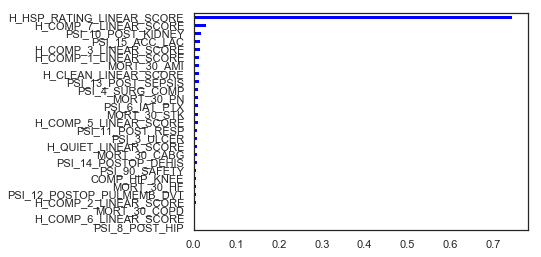

In [165]:
# Check the importance of the features
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_gbrt = pd.Series(gbrt.feature_importances_,
index = X.columns)
# Sort importances_fgbrt
sorted_importances_gbrt = importances_gbrt.sort_values()
# Make a horizontal bar plot
sorted_importances_gbrt.plot(kind='barh', color='blue')
plt.show()

In [166]:
# import the metrics class to compute the confusion matrix
from sklearn import metrics
Y_pred=gbrt.predict(X_test)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[ 39,  12,   0,   0,   0],
       [  3, 135,  44,   0,   0],
       [  0,  20, 326,  25,   0],
       [  0,   0,  43, 191,   2],
       [  0,   0,   0,  12,  31]])

Text(0.5, 257.44, 'Predicted label')

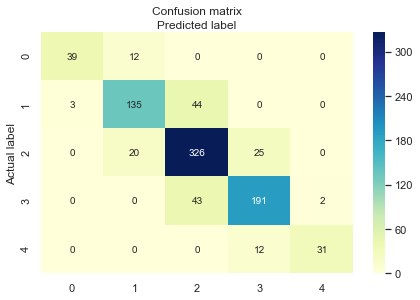

In [167]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# compute the confusion matrix heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [168]:
# Cross Validation
from sklearn.model_selection import cross_val_score
gbrt = GradientBoostingClassifier(random_state=0)
scores = cross_val_score(gbrt, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78358209 0.75471698 0.77735849 0.7509434  0.75       0.76893939
 0.78409091 0.79166667 0.82954545 0.79087452]
Mean: 0.778171790643402
Standard Deviation: 0.022843147151134006


### Prepare the hospitaldata_knn Dataset for the Classification Model Run

In [169]:
#Upload hospitaldata_knn.csv
hd_KMeans_G = pd.read_csv('https://raw.githubusercontent.com/maringow/DataMiningGroupProject/master/hospitaldata_knn.csv')

In [170]:
# Explore the KNN dataset
hd_KMeans_G.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 40 columns):
Unnamed: 0                      3529 non-null int64
Unnamed: 0.1                    3529 non-null int64
Provider ID                     3529 non-null object
Hospital Name                   3529 non-null object
Address                         3529 non-null object
City                            3529 non-null object
State                           3529 non-null object
ZIP Code                        3529 non-null float64
COMP_HIP_KNEE                   3529 non-null float64
MORT_30_AMI                     3529 non-null float64
MORT_30_CABG                    3529 non-null float64
MORT_30_COPD                    3529 non-null float64
MORT_30_HF                      3529 non-null float64
MORT_30_PN                      3529 non-null float64
MORT_30_STK                     3529 non-null float64
PSI_10_POST_KIDNEY              3529 non-null float64
PSI_11_POST_RESP                3529 n

In [171]:
# Drop columns flagged based on the Group Features Engineering strategy
hd_KMeans_G.drop(['H_RECMND_LINEAR_SCORE', 'Survey Response Rate Percent', 'Number of Completed Surveys', 'Unnamed: 0', 'Unnamed: 0.1', 'Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code' ], axis=1, inplace=True)

In [172]:
# Explore the KNN dataset
hd_KMeans_G.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 29 columns):
COMP_HIP_KNEE                3529 non-null float64
MORT_30_AMI                  3529 non-null float64
MORT_30_CABG                 3529 non-null float64
MORT_30_COPD                 3529 non-null float64
MORT_30_HF                   3529 non-null float64
MORT_30_PN                   3529 non-null float64
MORT_30_STK                  3529 non-null float64
PSI_10_POST_KIDNEY           3529 non-null float64
PSI_11_POST_RESP             3529 non-null float64
PSI_12_POSTOP_PULMEMB_DVT    3529 non-null float64
PSI_13_POST_SEPSIS           3529 non-null float64
PSI_14_POSTOP_DEHIS          3529 non-null float64
PSI_15_ACC_LAC               3529 non-null float64
PSI_3_ULCER                  3529 non-null float64
PSI_4_SURG_COMP              3529 non-null float64
PSI_6_IAT_PTX                3529 non-null float64
PSI_8_POST_HIP               3529 non-null float64
PSI_90_SAFETY             

In [173]:
#split dataset in features and target variable
X_kg = hd_KMeans_G[feature_cols] # Features
Y_kg = hd_KMeans_G.STAR_RATING # Target variable

### Run Gradient Boosted on the hospitaldata_knn Dataset

In [174]:
# Fit the Gradient Boosted Model
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, Y_train, Y_test = train_test_split(
    X_kg, Y_kg, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, Y_train)
gbrt.score(X_train, Y_train)
acc_gbrt = round(gbrt.score(X_train, Y_train) * 100, 2)

In [175]:
# Check the Gradient Boosted Accuracy against the test dataset
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, Y_train)))
acc_train_kmeans = gbrt.score(X_train, Y_train)
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, Y_test)))
acc_test_kmeans = gbrt.score(X_test, Y_test)

Accuracy on training set: 0.922
Accuracy on test set: 0.806


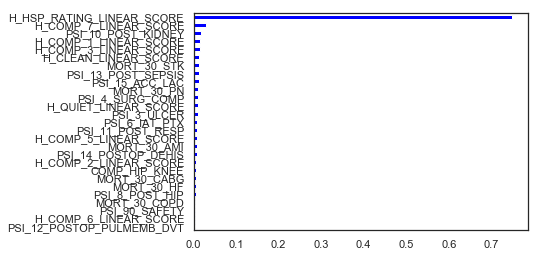

In [176]:
# Check the importance of the features
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_gbrt = pd.Series(gbrt.feature_importances_,
index = X.columns)
# Sort importances_fgbrt
sorted_importances_gbrt = importances_gbrt.sort_values()
# Make a horizontal bar plot
sorted_importances_gbrt.plot(kind='barh', color='blue')
plt.show()

In [177]:
# import the metrics class to compute the confusion matrix
from sklearn import metrics
Y_pred=gbrt.predict(X_test)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[ 37,  14,   0,   0,   0],
       [  5, 134,  43,   0,   0],
       [  0,  20, 324,  27,   0],
       [  0,   0,  45, 183,   8],
       [  0,   0,   0,   9,  34]])

Text(0.5, 257.44, 'Predicted label')

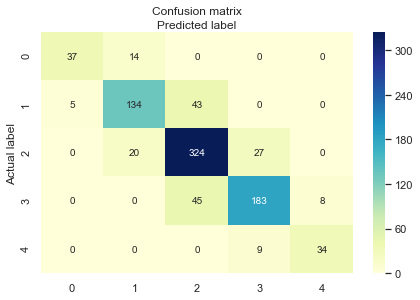

In [178]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# compute the confusion matrix heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [179]:
# Cross Validation
from sklearn.model_selection import cross_val_score
gbrt = GradientBoostingClassifier(random_state=0)
scores = cross_val_score(gbrt, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.7761194  0.76603774 0.77735849 0.7509434  0.74621212 0.76136364
 0.79545455 0.76893939 0.81060606 0.78707224]
Mean: 0.774010702654835
Standard Deviation: 0.018813328194241603


### Prepare the hospitaldata_mean Dataset for the Classification Model Run

In [180]:
#Upload hospitaldata_mean.csv
hd_means_GB = pd.read_csv('https://raw.githubusercontent.com/maringow/DataMiningGroupProject/master/hospitaldata_mean.csv')

In [181]:
# Explore the Means dataset
hd_means_GB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 40 columns):
Unnamed: 0                      3529 non-null int64
Unnamed: 0.1                    3529 non-null int64
Provider ID                     3529 non-null object
COMP_HIP_KNEE                   3529 non-null float64
MORT_30_AMI                     3529 non-null float64
MORT_30_CABG                    3529 non-null float64
MORT_30_COPD                    3529 non-null float64
MORT_30_HF                      3529 non-null float64
MORT_30_PN                      3529 non-null float64
MORT_30_STK                     3529 non-null float64
PSI_10_POST_KIDNEY              3529 non-null float64
PSI_11_POST_RESP                3529 non-null float64
PSI_12_POSTOP_PULMEMB_DVT       3529 non-null float64
PSI_13_POST_SEPSIS              3529 non-null float64
PSI_14_POSTOP_DEHIS             3529 non-null float64
PSI_15_ACC_LAC                  3529 non-null float64
PSI_3_ULCER                     35

In [182]:
# Drop columns flagged based on the Group Features Engineering strategy
hd_means_GB.drop(['H_RECMND_LINEAR_SCORE', 'Survey Response Rate Percent', 'Number of Completed Surveys', 'Unnamed: 0', 'Unnamed: 0.1', 'Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code' ], axis=1, inplace=True)

In [183]:
# Explore the Means dataset
hd_means_GB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 29 columns):
COMP_HIP_KNEE                3529 non-null float64
MORT_30_AMI                  3529 non-null float64
MORT_30_CABG                 3529 non-null float64
MORT_30_COPD                 3529 non-null float64
MORT_30_HF                   3529 non-null float64
MORT_30_PN                   3529 non-null float64
MORT_30_STK                  3529 non-null float64
PSI_10_POST_KIDNEY           3529 non-null float64
PSI_11_POST_RESP             3529 non-null float64
PSI_12_POSTOP_PULMEMB_DVT    3529 non-null float64
PSI_13_POST_SEPSIS           3529 non-null float64
PSI_14_POSTOP_DEHIS          3529 non-null float64
PSI_15_ACC_LAC               3529 non-null float64
PSI_3_ULCER                  3529 non-null float64
PSI_4_SURG_COMP              3529 non-null float64
PSI_6_IAT_PTX                3529 non-null float64
PSI_8_POST_HIP               3529 non-null float64
PSI_90_SAFETY             

In [184]:
#split dataset in features and target variable
X_mg = hd_means_GB[feature_cols] # Features
Y_mg = hd_means_GB.STAR_RATING # Target variable

### Run Gradient Boosted on the hospitaldata_mean Dataset

In [185]:
# Fit the Gradient Boosted Model
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, Y_train, Y_test = train_test_split(
    X_mg, Y_mg, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, Y_train)
gbrt.score(X_train, Y_train)
acc_gbrt = round(gbrt.score(X_train, Y_train) * 100, 2)

In [186]:
# Check the Gradient Boosted Accuracy against the test dataset
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, Y_train)))
acc_train_means  = gbrt.score(X_train, Y_train)
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, Y_test)))
acc_test_means = gbrt.score(X_test, Y_test)

Accuracy on training set: 0.916
Accuracy on test set: 0.815


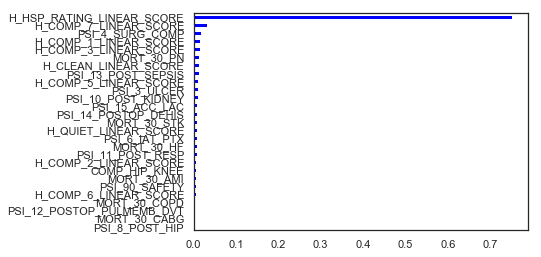

In [187]:
# Check the importance of the features
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_gbrt = pd.Series(gbrt.feature_importances_,
index = X.columns)
# Sort importances_fgbrt
sorted_importances_gbrt = importances_gbrt.sort_values()
# Make a horizontal bar plot
sorted_importances_gbrt.plot(kind='barh', color='blue')
plt.show()

In [188]:
# import the metrics class to compute the confusion matrix
from sklearn import metrics
Y_pred=gbrt.predict(X_test)
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[ 37,  14,   0,   0,   0],
       [  3, 136,  43,   0,   0],
       [  0,  17, 330,  24,   0],
       [  0,   0,  46, 185,   5],
       [  0,   0,   0,  11,  32]])

Text(0.5, 257.44, 'Predicted label')

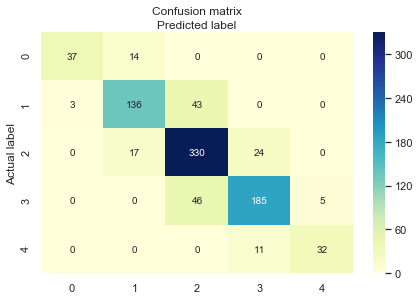

In [189]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# compute the confusion matrix heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [190]:
# Cross Validation
from sklearn.model_selection import cross_val_score
gbrt = GradientBoostingClassifier(random_state=0)
scores = cross_val_score(gbrt, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79850746 0.74716981 0.76603774 0.77735849 0.75       0.78030303
 0.79166667 0.76893939 0.82954545 0.76425856]
Mean: 0.7773786601010042
Standard Deviation: 0.02326938057829828


## XGBoost Regression Summary

In [193]:
results = pd.DataFrame({
    'Model': ['XGBoost Iterative', 
              'XGBoost KMeans', 
              'XGBoost Means'],
    'RMSE_Train': [RMSE_iter_t, RMSE_knn_t, RMSE_means_t],
    'RMSE_Test': [RMSE_iter_test, RMSE_knn_test, RMSE_means_test]})
result_df = results.sort_values(by='RMSE_Test', ascending=True)
result_df = result_df.set_index('Model')
result_df

,RMSE_Train,RMSE_Test
Model,,
XGBoost Iterative,0.648198,1.310066
XGBoost Means,0.856367,1.340707
XGBoost KMeans,0.858971,1.347106


## Gradient Boosted Classification Summary

In [192]:
results = pd.DataFrame({
    'Model': ['Gradient Boosted Iterative', 
              'Gradient Boosted KMeans', 
              'Gradient Boosted Means'],
    'Score_Train': [acc_train_iter, acc_train_kmeans, acc_train_means],
    'Score_Test': [acc_test_iter, acc_test_kmeans, acc_test_means]})
result_df = results.sort_values(by='Score_Test', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score_Train,Score_Test
Model,,
Gradient Boosted Iterative,0.925926,0.817667
Gradient Boosted Means,0.915722,0.815402
Gradient Boosted KMeans,0.922147,0.806342


## Recommended Model = Gradient Boosted Classification Using Dataset with Iterative Missing values Imputation